# **Análisis no supervisado (Machine Learning)**

# Algoritmos de Clustering

Caracteristicas:
- agrupa objetos similares en cluster y
- separa de aquellos objetos que son diferentes.

# K-means

1. se elige de manera aleatoria posiciones para los centroides.
2. calculamos la distancia entre los datos y los centroides.
3. calcula (de manera euclideana) la distancia entre los centroides y los puntos ya asignados.
4. optimizar las posiciones de los centroides para reducir la varianza (información).

**Ejemplo 1** Vamos a generar datos sintéticos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn. model_selection import train_test_split as train_test_split
from sklearn.datasets import make_blobs
from sklearn. cluster import KMeans
from sklearn.preprocessing import StandardScaler

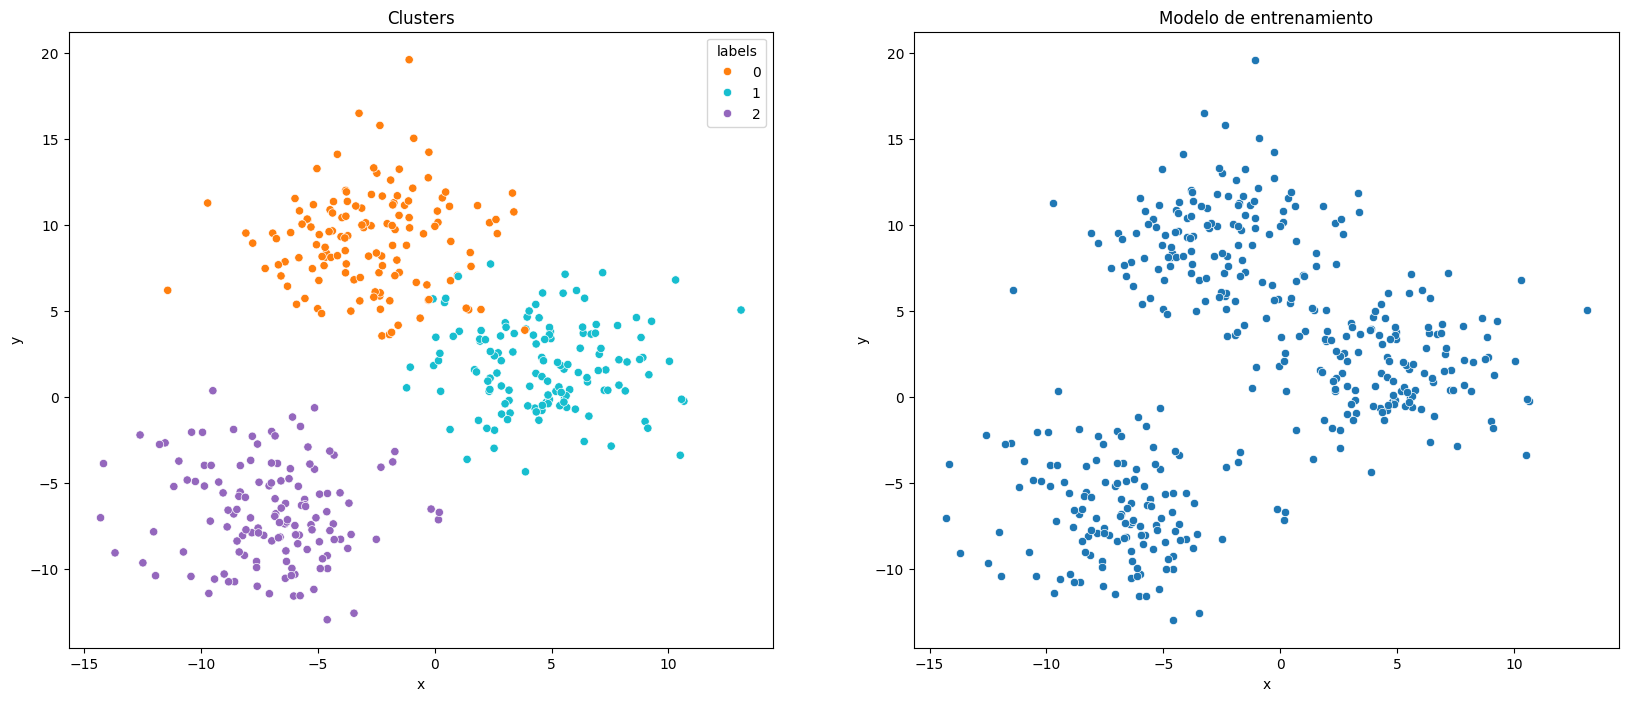

In [ ]:
f, l = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

def scatter_plots(df, palette):
  fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 8))
  fig. subplots_adjust (hspace=0.5, wspace=0.2)

  ax1 = plt. subplot(1,2,1)
  sns. scatterplot (ax = ax1, data=df, x='x', y='y', hue= 'labels', palette=palette)
  plt.title('Clusters')

  ax2 = plt. subplot (1,2,2)
  sns.scatterplot (ax = ax2, data=df, x='x', y='y')
  plt.title('Modelo de entrenamiento')

palette = {1:"tab:cyan",0:"tab:orange", 2:"tab:purple"}
df = pd.DataFrame(f, columns=['x', 'y'])
df ['labels'] = l
scatter_plots (df, palette)

# **Preprocesamiento**


* Datos faltantes: K-means es sensitivo a outliers.

* Normalización: K-Means solo funciona con valores enteros. Por lo tanto transformamos las variables categóricas a valores enteros o codificamos para crear variables binarias separadas.
* Reducción de la dimensión: Principal-Component-Analysis (PCA).
* Escalamiento: Es importante reescalar los datos.

In [ ]:
scaler = StandardScaler()
scaled_f = scaler.fit_transform(f)

X = scaled_f #Datos entrenados
y = l #Etiquetas predictivas
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.7, random_state=0)

# **Entrenamiento del modelo**

Opciones para configurar el proceso de clustering:

* n_clusters: Número de cluster esperados.
*n_Init: Número de iteraciones con centroide inicial. El algoritmo regresa el mejor modelo.
*max_iter: El número máximo de iteraciones para un solo paso.

In [ ]:
kmeans = KMeans (
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans. fit(X_train)
print(f'Converge después {kmeans.n_iter_} iteraciones')

Converge después 7 iteraciones


# **Visualizar predicciones**

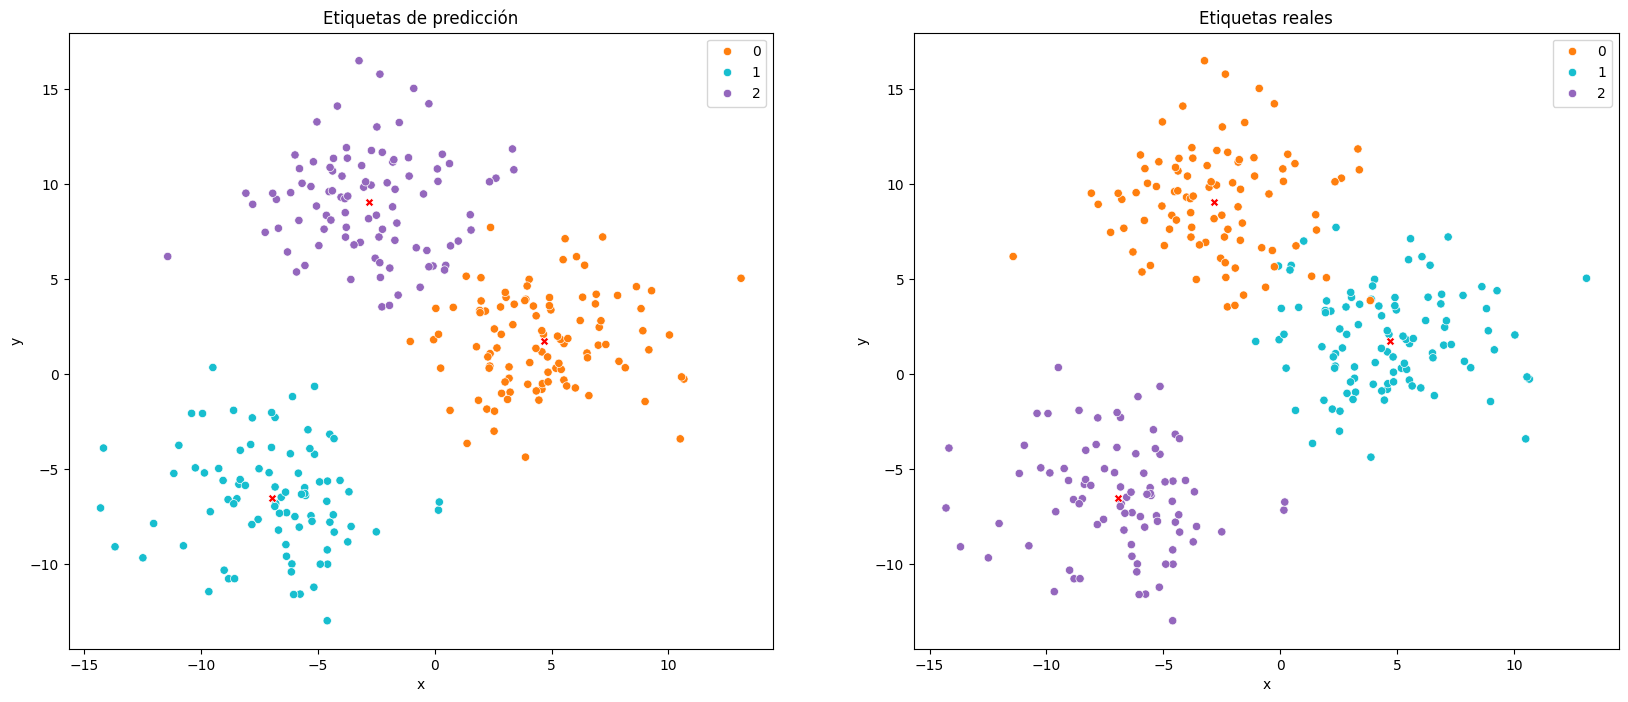

In [ ]:
cluster_center = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_center , columns=['x', 'y'])

X_train_unscaled = scaler.inverse_transform(X_train)
df_train = pd.DataFrame (X_train_unscaled, columns=['x', 'y'])
df_train['pred_label'] = kmeans.labels_
df_train['true_label'] = y_train

def scatter_plots(df, cc, palette):
  fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 8))
  fig. subplots_adjust (hspace=0.5, wspace=0.2)

  ax2 = plt. subplot(1,2,1)
  sns.scatterplot (ax = ax2, data=df, x='x', y='y', hue='pred_label', palette=palette)
  sns.scatterplot(ax = ax2, data=cc, x='x', y='y', color='r', marker="X")
  plt.title('Etiquetas de predicción')

  ax1 = plt. subplot(1,2,2)
  sns.scatterplot (ax = ax1, data=df, x='x', y='y', hue='true_label', palette=palette)
  sns.scatterplot(ax = ax1, data=cc, x='x', y='y', color='r', marker="X")
  plt.title('Etiquetas reales')

palette = {1: "tab:cyan",0: "tab:orange", 2:"tab:purple"}
scatter_plots(df_train, df_cluster_centers, palette)

In [ ]:
df_eval = df_train.copy()

In [ ]:
df_eval["true_label"] = df_eval["true_label"].map({0:"A", 1: "B", 2: "C"})

In [ ]:
df_eval["pred_label"] = df_eval["pred_label"].map({0:"A", 1: "B", 2: "C"})

In [ ]:
df_eval.head(15)

,x,y,pred_label,true_label
0,-9.007547,-10.302910,B,C
1,1.009238,7.009681,C,B
2,-6.565501,-6.466780,B,C
3,2.389772,7.727235,A,B
4,-5.422666,-2.915796,B,C
5,-12.024305,-7.846772,B,C
6,-4.006250,9.319323,C,A
7,-6.297788,6.435267,C,A
8,2.169238,3.325947,A,B
9,-5.140506,-4.205585,B,C
